The script follows Chapter-4 of the book "Deep Learning for Coders with fastai and PyTorch"  

Continuation of 3-vs-7-no-ml.ipynb

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.8 MB/s eta 0:0

In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Collecting a sample dataset from MNIST for image(number) recognition

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

Both the train and valid sets contain a collection of images for number 3 and 7

The ls function also gives the numer of files as (#n) at the beginning

In [6]:
#(path/'valid').ls()
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [8]:
im3_path = threes[20]
im3 = Image.open(im3_path)
im3

In [9]:
#array(im3)[10:20, 10:20] --> gives the same

#im3.shape --> 28*28
tensor(im3)[10:20, 10:20]


tensor([[  0,  88, 222, 254, 254, 254, 254, 171,  36,   0],
        [131, 246, 254, 254, 254, 254, 227,  29,   0,   0],
        [245, 254, 254, 254, 254, 200,  66,   0,   0,   0],
        [245, 254, 254, 254, 254, 249, 245, 240, 176, 144],
        [158, 251, 254, 254, 254, 254, 254, 254, 254, 254],
        [  0, 112, 177, 220, 254, 254, 254, 254, 254, 254],
        [  0,   0,   0,  11,  19,  48,  99,  95, 206, 254],
        [  0,   0,   0,   0,   0,   0,   0,   5, 171, 254],
        [  0,   0,   0,   0,   0,   0,  40, 147, 254, 254],
        [ 16,  33,  39,  32,  74, 200, 243, 254, 254, 254]], dtype=torch.uint8)

In [10]:
tensor(im3)[4:15,4:22]

tensor([[  0,   0,   0,   0,   6,  39,  63,  47, 226, 255, 218, 254, 254, 251, 114,   0,   0,   0],
        [  0,   0,   0,   0,  72, 241, 254, 241, 254, 254, 254, 254, 254, 254, 244, 155,  18,   0],
        [  0,   0,   0,   0,  86, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 152,   0],
        [  0,   0,   0,   0,  10, 101, 156, 244, 213,  87, 108, 223, 254, 254, 254, 254, 131,   0],
        [  0,   0,   0,   0,   0,   0,   0,  32,  12,  51, 232, 254, 254, 254, 254, 175,   9,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  92, 223, 254, 254, 254, 254, 169,  34,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  88, 222, 254, 254, 254, 254, 171,  36,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 131, 246, 254, 254, 254, 254, 227,  29,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 245, 254, 254, 254, 254, 200,  66,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 245, 254, 254, 254, 254, 249, 245, 240, 176, 144, 106,   0],


In [11]:
#slicing a portion and plotting
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,6,39,63,47,226,255,218,254,254,251,114,0,0,0
1,0,0,0,0,72,241,254,241,254,254,254,254,254,254,244,155,18,0
2,0,0,0,0,86,254,254,254,254,254,254,254,254,254,254,254,152,0
3,0,0,0,0,10,101,156,244,213,87,108,223,254,254,254,254,131,0
4,0,0,0,0,0,0,0,32,12,51,232,254,254,254,254,175,9,0
5,0,0,0,0,0,0,0,0,92,223,254,254,254,254,169,34,0,0
6,0,0,0,0,0,0,0,88,222,254,254,254,254,171,36,0,0,0
7,0,0,0,0,0,0,131,246,254,254,254,254,227,29,0,0,0,0
8,0,0,0,0,0,0,245,254,254,254,254,200,66,0,0,0,0,0
9,0,0,0,0,0,0,245,254,254,254,254,249,245,240,176,144,106,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

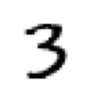

In [13]:
#Same as Image function of Jupyter, but show_image is from fastai
show_image(three_tensors[1]);

For every pixel position, the average over all the images of the intensity of that pixel is computed.

All images are combined into a list of a single three-dimensional tensor (or rank-3 tensor); done with PyTorch's 'stack' function

Then converted into floats, since in PyTorch operations as mean requires float types

The individual values in the rank-3 tensor are also normalized with the highest value of the itensity, i.e., 255

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens.shape
##There are 6265 images, each of size 28*28 pixels

torch.Size([6265, 28, 28])

**rank** is the number of axes or dimensions in a tensor; **shape** is the size of each axis of a tensor

In [15]:
#Either function gives the rank of the tensor

len(stacked_sevens.shape)
#stacked_sevens.ndim

3

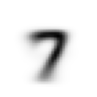

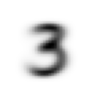

In [16]:
#For every pixel position, the average of that pixel over all images

mean3 = stacked_threes.mean(0)

mean7 = stacked_sevens.mean(0)
show_image(mean7); show_image(mean3);

A distinction from a random 3 or 7 is made by determining the difference between the random number and the mean using **MAE** and **RMSE**

Smaller the error, closer the similarities between random and mean

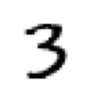

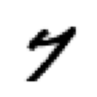

In [17]:
rand_3 = stacked_threes[1]
rand_7 = stacked_sevens[1]

show_image(rand_3); show_image(rand_7);

In [18]:
dist_3_abs = (rand_7 - mean3).abs().mean()
dist_3_sqr = ((rand_7 - mean3)**2).mean().sqrt()


dist_7_abs = (rand_7 - mean7).abs().mean()
dist_7_sqr = ((rand_7 - mean7)**2).mean().sqrt()

dist_3_abs,dist_3_sqr, dist_7_abs,dist_7_sqr

(tensor(0.1854), tensor(0.3271), tensor(0.1304), tensor(0.2585))

In [19]:
dist_3_abs = (rand_3 - mean3).abs().mean()
dist_3_sqr = ((rand_3 - mean3)**2).mean().sqrt()


dist_7_abs = (rand_3 - mean7).abs().mean()
dist_7_sqr = ((rand_3 - mean7)**2).mean().sqrt()

dist_3_abs,dist_3_sqr, dist_7_abs,dist_7_sqr

(tensor(0.1114), tensor(0.2021), tensor(0.1586), tensor(0.3021))

These are considered as *loss functions* in ML lingo.

In PyTorch, MSE can be determined using function 'l1_loss' 

In [20]:
l_mae = F.l1_loss(rand_3.float(),mean7)
l_rmse = F.mse_loss(rand_3,mean7).sqrt()

l_mae, l_rmse

(tensor(0.1586), tensor(0.3021))

Using validation data for cross checking

In [21]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

**Determining Loss function for ML**

The following steps are made

1. Combining and Reshaping the Data:
   
    The two tensors (stacked_threes, stacked_sevens), containing the images of digits, are concatenated with 'torch.cat' along the first dimension (-1)

    view(-1, 28x28) reshapes the concatenated tensor to have a shape of (-1, 784), where -1 means that the size of this dimension. Each image is flattened into a 1D tensor of size 784 (28x28)

2. Creating Labels:

   'tensor([1]xlen(threes) + [0]xlen(sevens))' creates a tensor of labels where each image of a *3* is labeled as 1 and each image of a *7* is labeled as 0

    'unsqueeze(1)' adds an extra dimension to the tensor, making it a column vector. So, if train_y was originally a 1D tensor of shape (n,), it becomes a 2D tensor of shape (n, 1)



In [29]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

3. Creating a Dataset:
   train_x and train_y are combined into a list of tuples, where each tuple is an (image, label) pair

In [30]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [32]:
#Same for validation set

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [38]:
#Initial random weight for each pixel

def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
#weights

#Adding bias for more flexibility;  y=w*x + b

bias = init_params(1)

In [45]:
#predicting for one image
#weights.T is the transpose of the weight; Done for matrix multiplication of a single x

#train_x[0].shape, weights.shape, weights.T.shape
(train_x[0]*weights.T).sum() + bias

tensor([-2.5707], grad_fn=<AddBackward0>)

In [46]:
#Matrix multiplication for the entire set

def linear1(xb): return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[-2.5707],
        [ 5.9399],
        [-1.6288],
        ...,
        [ 8.7941],
        [-1.4586],
        [ 6.0677]], grad_fn=<AddBackward0>)

Checking the accuracy. Whether the output corresponds to 3 or 7 can be determined by checking if it's greater than 0 or not

In [47]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [ True],
        [False],
        ...,
        [False],
        [ True],
        [False]])

In [48]:
corrects.float().mean().item()

0.43473702669143677

**Defining the loss function**

The function *mnist_loss* calculates the loss for a set of predictions given the true/real targets

'torch.where(targets == 1, 1 - predictions, predictions)'

'torch.where' checks each element in targets:

If targets == 1, it selects 1 - predictions.

If targets != 1 (i.e., targets == 0), it selects predictions.

Then the mean of the selected values is determined, providing the average loss over all inputs.

The 'sigmoid' funtion from PyTorch ensures that the outputs remains within 0 and 1

For more details, pls go through the chapter

In [51]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

Next a leaner a created with training model over data in batches

For each epoch, the process will be like:

    for x,y in dl:
        pred = model(x)
        loss = loss_func(pred, y)
        loss.backward()
        parameters -= parameters.grad * lr

In [72]:
#reinitializing the parameters:

weights = init_params((28*28,1))
bias = init_params(1)

#Creating batches of size 256, first(dl) collects the first batch
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [73]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [74]:
##Basic training loop for an epoch##

#Calculating gradient
#Resetting the gradients to None after an update is crucial to prevent gradient accumulation across multiple training steps. This ensures that the gradients computed in the next iteration are not influenced by the gradients from previous iterations.

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()


#function to calculate our validation accuracy

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()


# validating epochs over batches

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


validate_epoch(linear1)

0.6231

In [75]:
#Training for one epoch

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7358

In [76]:
#more epochs
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.872 0.9178 0.9384 0.9447 0.9535 0.9569 0.9623 0.9657 0.9652 0.9657 0.9666 0.9696 0.9696 0.9706 0.9715 0.972 0.972 0.972 0.9725 0.9725 

This ends the manual generation of a basic (linear: y=w*x + b) ML model for number recognization. The results shows imporving accuracy after each epoch.

The chapter next introduces **Optimizer** using both PyTorch and FastAI tools, which produces same results but with only a few steps

Furthermore, the concept of **Nonlinearlity** is also introduced.

So for futher details follow there!